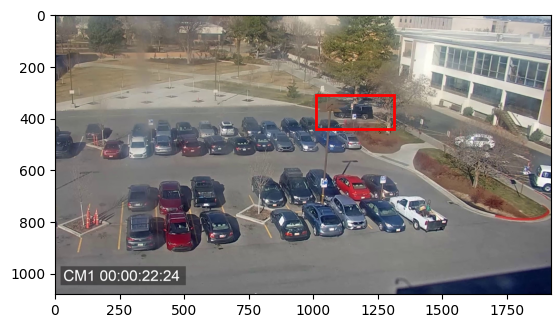

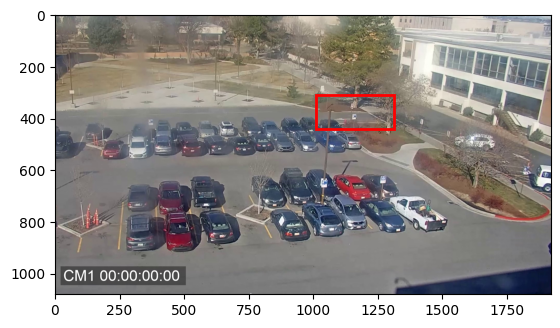

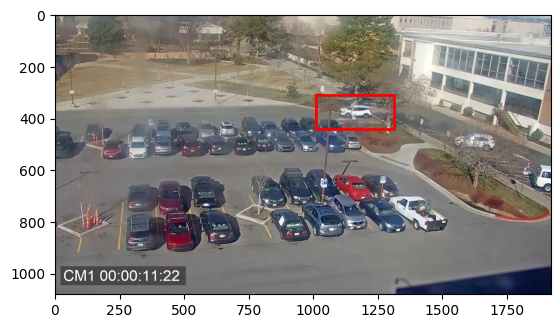

In [7]:
# This notebook is for testing purpose!!!

import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Function to visualize bounding box on an image
def visualize_bbox(image_path, bbox):
    # Read the image
    image = plt.imread(image_path)
     
    # Plot the image
    plt.imshow(image)
    
    # Extract bounding box coordinates
    x_center, y_center, width, height = bbox
    
    # Convert coordinates to pixel values
    image_width = image.shape[1]
    image_height = image.shape[0]
    x = x_center * image_width
    y = y_center * image_height
    w = width * image_width
    h = height * image_height
    
    # Create a Rectangle patch
    rect = patches.Rectangle((x - w/2, y - h/2), w, h, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the plot
    plt.gca().add_patch(rect)
    
    # Show plot
    plt.show()

# Path to folder containing images
folder_path = "/home/noman/parking-spot-tracking/testEntryCoordinate/"

# Bounding box coordinates
bbox = (0.6044635416666666, 0.3456018518518518, 0.15838020833333333, 0.12032407407407408)

# Visualize bounding box on each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpg"): 
        image_path = os.path.join(folder_path, filename)
        visualize_bbox(image_path, bbox)

In [12]:
x_center, y_center, width, height = 0.6044635416666666, 0.3456018518518518, 0.15838020833333333, 0.12032407407407408
print(x_center)
print(y_center)
print(width)
print(height)
            
# Calculate top-left and bottom-right coordinates
x = x_center - width // 2
y = y_center - height // 2
x2 = x_center + width // 2
y2 = y_center + height // 2

print(x)
print(y)
print(x2)
print(y2)

0.6044635416666666
0.3456018518518518
0.15838020833333333
0.12032407407407408
0.6044635416666666
0.3456018518518518
0.6044635416666666
0.3456018518518518


In [8]:
import cv2
import torch
from ultralytics import YOLO

def detect_objects(frame_path="/home/noman/parking-spot-tracking/testEntryCoordinate/frame_353.jpg",
                   entry_area=(0.6044635416666666, 0.3456018518518518, 0.15838020833333333, 0.12032407407407408),
                   confidence_threshold=0.0):

    # Load the image using OpenCV
    frame = cv2.imread(frame_path)

    # Convert BGR to RGB (OpenCV uses BGR by default)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    entry_area = [entry_area[0] * frame.shape[1], entry_area[1] * frame.shape[0], entry_area[2] * frame.shape[1],
                  entry_area[3] * frame.shape[0]]

    # Check if CUDA (GPU support) is available
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

    # Build a YOLOv9c model from pretrained weight
    model = YOLO('/home/noman/parking-spot-tracking/yolov9c.pt').to(device)

    # Detect objects in frame
    results = model(frame_rgb)

    # Loop through all images in the batch
    for _, result in enumerate(results):
        boxes = result.boxes.xyxy.cpu().numpy()
        cls = result.boxes.cls.cpu().numpy().astype(int)
        confs = result.boxes.conf.cpu().numpy()

        # Loop through detected objects in the current image
        for box, label, conf in zip(boxes, cls, confs):
            print("box_1: ", box[0], box[1], box[2], box[3])
            print("box_2: ", entry_area[0] - entry_area[2] / 2, entry_area[1] - entry_area[3] / 2,
                  entry_area[0] + entry_area[2] / 2, entry_area[1] + entry_area[3] / 2)

In [9]:
detect_objects()


0: 384x640 25 cars, 1 truck, 33.2ms
Speed: 2.6ms preprocess, 33.2ms inference, 2.3ms postprocess per image at shape (1, 3, 384, 640)
box_1:  1174.9639 711.3589 1355.5507 843.4367
box_2:  1008.525 308.275 1312.615 438.225
box_1:  1073.5466 616.084 1224.2618 721.44336
box_2:  1008.525 308.275 1312.615 438.225
box_1:  952.16656 726.66724 1119.2004 860.18353
box_2:  1008.525 308.275 1312.615 438.225
box_1:  831.371 750.9646 985.0338 877.48846
box_2:  1008.525 308.275 1312.615 438.225
box_1:  556.348 753.9324 694.4308 886.21436
box_2:  1008.525 308.275 1312.615 438.225
box_1:  1062.3674 694.0521 1208.0146 831.644
box_2:  1008.525 308.275 1312.615 438.225
box_1:  1181.2278 616.1781 1330.9541 718.4562
box_2:  1008.525 308.275 1312.615 438.225
box_1:  1292.3438 700.8081 1518.653 841.0684
box_2:  1008.525 308.275 1312.615 438.225
box_1:  414.6573 758.48816 542.26416 916.95654
box_2:  1008.525 308.275 1312.615 438.225
box_1:  522.7988 621.90875 627.61096 750.57874
box_2:  1008.525 308.275 1312.

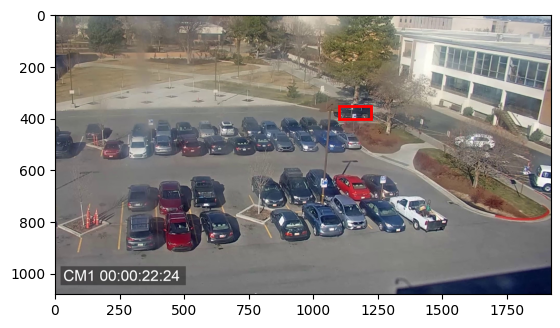

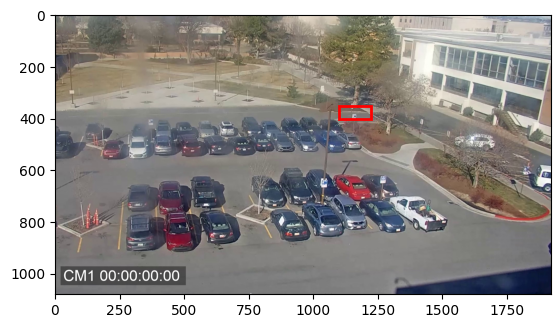

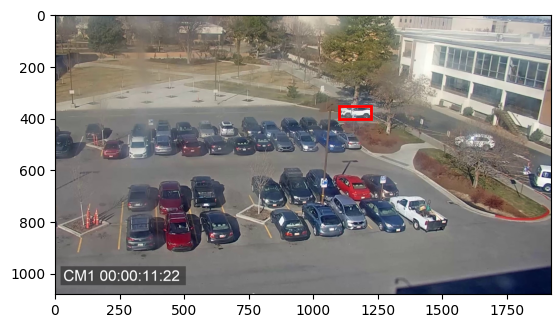

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

# Function to visualize bounding box on an image
def visualize_bbox(image_path, bbox):
    # Read the image
    image = plt.imread(image_path)
     
    # Plot the image
    plt.imshow(image)
    
    # Extract bounding box coordinates
    xmin, ymin, xmax, ymax = bbox
    
    # Convert coordinates to pixel values
    # image_width = image.shape[1]
    # image_height = image.shape[0]
    x = xmin
    y = ymin
    w = (xmax - xmin)
    h = (ymax - ymin)
    
    # Create a Rectangle patch
    rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='r', facecolor='none')
    
    # Add the patch to the plot
    plt.gca().add_patch(rect)
    
    # Show plot
    plt.show()

# Path to folder containing images
folder_path = "/home/noman/parking-spot-tracking/testEntryCoordinate/"

# Bounding box coordinates
bbox = (1097.5137, 350.4918, 1223.4437, 402.5712)

# box_1:  1097.5137, 350.4918, 1223.4437, 402.5712
# box_2:  1008.525, 308.275, 1312.615, 438.225

# Visualize bounding box on each image in the folder
for filename in os.listdir(folder_path):
    if filename.endswith(".jpg") or filename.endswith(".jpg"): 
        image_path = os.path.join(folder_path, filename)
        visualize_bbox(image_path, bbox)


In [1]:
import cv2
import os

def create_video_from_images(image_folder, output_path, output_fps=5):
    # Get the list of image files
    image_files = [os.path.join(image_folder, img) for img in os.listdir(image_folder) if img.endswith(".jpg")]

    # Sort the image files by filename
    image_files.sort()

    # Get the dimensions of the first image
    img = cv2.imread(image_files[0])
    height, width, _ = img.shape

    # Define the video codec and create a VideoWriter object
    fourcc = cv2.VideoWriter_fourcc(*'XVID')
    video_writer = cv2.VideoWriter(output_path, fourcc, output_fps, (width, height))

    # Write each image to the video
    for image_file in image_files:
        img = cv2.imread(image_file)
        video_writer.write(img)

    # Release the VideoWriter object
    video_writer.release()

# Define the input image folder and output video path
image_folder = "/home/noman/parking-spot-tracking/detections"
output_path = "/home/noman/parking-spot-tracking/data/output_video.mp4"

# Create the video from images
create_video_from_images(image_folder, output_path)

OpenCV: FFMPEG: tag 0x44495658/'XVID' is not supported with codec id 12 and format 'mp4 / MP4 (MPEG-4 Part 14)'
OpenCV: FFMPEG: fallback to use tag 0x7634706d/'mp4v'


In [1]:
from centroid_tracker import CentroidTracker

# Initialize CentroidTracker
ct = CentroidTracker()

# Simulate centroids (representing detected objects)
centroids = [(100, 100), (200, 200), (300, 300)]

# Register centroids with CentroidTracker
for centroid in centroids:
    ct.register(centroid)

# Simulate objects disappearing (not detected in subsequent frames)
objects_to_deregister = [0, 2]

# Deregister objects from CentroidTracker
for object_id in objects_to_deregister:
    ct.deregister(object_id)

# Print remaining objects being tracked
print("Remaining objects being tracked:")
print(ct.objects)


Remaining objects being tracked:
{1: (200, 200)}
